<h1 style="text-align: center; font-weight: bold;">Data Sciense Course - Spring 1403</h1>
<h1 style="text-align: center; font-weight: bold;">Computer Assignment 3 - Introduction to Data Science </h1>
<h1 style="text-align: center;">Mohammadreza Mohammadhashemi : 810100206</h1>
<h1 style="text-align: center;">Soheil Hajian Manesh : 810100119</h1>
<h1 style="text-align: center;">Mahdi Ebrahimi Soltani : 810100241</h1>

# Problem Description
In this assignment, we work with PySpark, which is the Python API for Apache Spark. It enables performing real-time, large-scale data processing in a distributed environment using Python.

In [1]:
from IPython.display import display, HTML
display(HTML('<style>pre { white-space: pre !important; }</style>'))

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql import DataFrame
from pyspark.sql.types import StructType, StructField, FloatType, DateType, LongType
from pyspark.sql.functions import to_date,year,month,min,mean,stddev,when,col,current_date,count, desc ,asc
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.window import Window

# Warm-Up!

In [3]:
def show_dataframe_info(df: DataFrame,num_of_rows=10):
    print("Schema:")
    df.printSchema()
    print(f"Number of Rows: {df.count()}")
    print("First Few Rows:")
    df.show(num_of_rows)  

## Question 1,2: Read & findout schema of data. 

In [4]:
spark = SparkSession.builder.getOrCreate()

schema = StructType([
    StructField("Date", DateType(), True),
    StructField("Open", FloatType(), True),
    StructField("High", FloatType(), True),
    StructField("Low", FloatType(), True),
    StructField("Close", FloatType(), True),
    StructField("Volume", LongType(), True),
    StructField("Adj Close", FloatType(), True)
])

df = spark.read.option("header", True).schema(schema).csv("stocks.csv")

show_dataframe_info(df,10)

24/04/19 02:13:04 WARN Utils: Your hostname, IdeaPad-5-15ITL05-55a06dec resolves to a loopback address: 127.0.1.1; using 192.168.1.34 instead (on interface wlp0s20f3)
24/04/19 02:13:04 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/04/19 02:13:04 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Schema:
root
 |-- Date: date (nullable = true)
 |-- Open: float (nullable = true)
 |-- High: float (nullable = true)
 |-- Low: float (nullable = true)
 |-- Close: float (nullable = true)
 |-- Volume: long (nullable = true)
 |-- Adj Close: float (nullable = true)

Number of Rows: 1762
First Few Rows:
+----------+---------+---------+---------+---------+---------+---------+
|      Date|     Open|     High|      Low|    Close|   Volume|Adj Close|
+----------+---------+---------+---------+---------+---------+---------+
|2010-01-04|   213.43|    214.5|   212.38|   214.01|123432400| 27.72704|
|2010-01-05|214.59999|   215.59|   213.25|214.37999|150476200|27.774977|
|2010-01-06|214.37999|   215.23|   210.75|   210.97|138040000|27.333178|
|2010-01-07|   211.75|    212.0|   209.05|   210.58|119282800| 27.28265|
|2010-01-08|210.29999|    212.0|   209.06|211.98001|111902700|27.464033|
|2010-01-11|    212.8|    213.0|208.45001|   210.11|115557400|27.221758|
|2010-01-12|   209.19|209.76999|   206.42|

## Question 3 : Select opening, closing and volume for record with closing less than 500

In [8]:
q3_df = df.where(df["Close"]<500).select("Open","Close","Volume")
show_dataframe_info(q3_df,30)

Schema:
root
 |-- Open: float (nullable = true)
 |-- Close: float (nullable = true)
 |-- Volume: long (nullable = true)

Number of Rows: 1359
First Few Rows:
+---------+---------+---------+
|     Open|    Close|   Volume|
+---------+---------+---------+
|   213.43|   214.01|123432400|
|214.59999|214.37999|150476200|
|214.37999|   210.97|138040000|
|   211.75|   210.58|119282800|
|210.29999|211.98001|111902700|
|    212.8|   210.11|115557400|
|   209.19|   207.72|148614900|
|207.87001|210.65001|151473000|
|   210.11|   209.43|108223500|
|   210.93|   205.93|148516900|
|   208.33|   215.04|182501900|
|   214.91|   211.73|153038200|
|212.07999|208.06999|152038600|
|   206.78|   197.75|220441900|
|   202.51|   203.07|266424900|
|   205.95|   205.94|466777500|
|206.84999|   207.88|430642100|
|204.93001|   199.29|293375600|
|   201.08|   192.06|311488100|
|   192.37|   194.73|187469100|
|   195.91|   195.86|174585600|
|   195.17|   199.23|153832000|
|   196.73|   192.05|189413000|
|   192.63

## Question 4 : records with opening price more than 200 and closing price less than 200.

In [9]:
q4_df = df.filter((df["Open"] > 200) & (df["Close"] < 200))
show_dataframe_info(q4_df)

Schema:
root
 |-- Date: date (nullable = true)
 |-- Open: float (nullable = true)
 |-- High: float (nullable = true)
 |-- Low: float (nullable = true)
 |-- Close: float (nullable = true)
 |-- Volume: long (nullable = true)
 |-- Adj Close: float (nullable = true)

Number of Rows: 3
First Few Rows:
+----------+---------+-----+------+------+---------+---------+
|      Date|     Open| High|   Low| Close|   Volume|Adj Close|
+----------+---------+-----+------+------+---------+---------+
|2010-01-22|   206.78|207.5|197.16|197.75|220441900|25.620401|
|2010-01-28|204.93001|205.5| 198.7|199.29|293375600|25.819921|
|2010-01-29|   201.08|202.2|190.25|192.06|311488100|24.883207|
+----------+---------+-----+------+------+---------+---------+



## Question 5 : Extract the year from the date and save it in a new column.

In [10]:
q5_df = df.withColumn('year', year(df['Date']))
show_dataframe_info(q5_df)

Schema:
root
 |-- Date: date (nullable = true)
 |-- Open: float (nullable = true)
 |-- High: float (nullable = true)
 |-- Low: float (nullable = true)
 |-- Close: float (nullable = true)
 |-- Volume: long (nullable = true)
 |-- Adj Close: float (nullable = true)
 |-- year: integer (nullable = true)

Number of Rows: 1762
First Few Rows:
+----------+---------+---------+---------+---------+---------+---------+----+
|      Date|     Open|     High|      Low|    Close|   Volume|Adj Close|year|
+----------+---------+---------+---------+---------+---------+---------+----+
|2010-01-04|   213.43|    214.5|   212.38|   214.01|123432400| 27.72704|2010|
|2010-01-05|214.59999|   215.59|   213.25|214.37999|150476200|27.774977|2010|
|2010-01-06|214.37999|   215.23|   210.75|   210.97|138040000|27.333178|2010|
|2010-01-07|   211.75|    212.0|   209.05|   210.58|119282800| 27.28265|2010|
|2010-01-08|210.29999|    212.0|   209.06|211.98001|111902700|27.464033|2010|
|2010-01-11|    212.8|    213.0|208.45

## Question 6 : show the minimum volumes traded for each year.

In [11]:
q6_df=q5_df.groupby("year").agg(min("Volume").alias("minVolume"))
q6_df.show()

+----+---------+
|year|minVolume|
+----+---------+
|2015| 13046400|
|2013| 41888700|
|2014| 14479600|
|2012| 43938300|
|2016| 11475900|
|2010| 39373600|
|2011| 44915500|
+----+---------+



## Question 7 : Show the highest low price for each year and month

In [12]:
q7_df=q5_df.groupby(["year",month(df["Date"])]).agg(min("Volume").alias("minVolume"))
show_dataframe_info(q7_df,84)

Schema:
root
 |-- year: integer (nullable = true)
 |-- month(Date): integer (nullable = true)
 |-- minVolume: long (nullable = true)

Number of Rows: 84
First Few Rows:
+----+-----------+---------+
|year|month(Date)|minVolume|
+----+-----------+---------+
|2012|         10| 92681400|
|2010|          7|105137900|
|2010|         12| 39373600|
|2015|          2| 37362400|
|2014|          4| 40586000|
|2015|         12| 13570400|
|2016|          7| 23779900|
|2016|         11| 11475900|
|2012|          8| 48734700|
|2013|          2| 80628800|
|2012|          4|101680600|
|2012|         12| 43938300|
|2014|         10| 34187700|
|2016|          5| 28719100|
|2014|         12| 14479600|
|2013|          9| 57010100|
|2013|         10| 62775300|
|2014|          5| 39934300|
|2016|          2| 27582700|
|2013|         12| 41888700|
|2014|          1| 57319500|
|2010|         11| 59396400|
|2011|          3| 68504800|
|2013|          3| 73573500|
|2014|          8| 28116000|
|2013|          6| 

## Question 8 : Mean and standard deviation of high price over the whole data frame.

In [13]:
q8_df = df.agg(stddev("High").alias("Stddev High Price"),mean("High").alias("Mean High Price"))
show_dataframe_info(q8_df)

Schema:
root
 |-- Stddev High Price: double (nullable = true)
 |-- Mean High Price: double (nullable = true)

Number of Rows: 1
First Few Rows:
+-----------------+-----------------+
|Stddev High Price|  Mean High Price|
+-----------------+-----------------+
|186.8981766989906|315.9112879420788|
+-----------------+-----------------+



# Main Task

In [5]:
spotify_df = spark.read.parquet("spotify.parquet")
show_dataframe_info(spotify_df,5)

Schema:
root
 |-- id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- album: string (nullable = true)
 |-- album_id: string (nullable = true)
 |-- artists: string (nullable = true)
 |-- artist_ids: string (nullable = true)
 |-- track_number: long (nullable = true)
 |-- disc_number: long (nullable = true)
 |-- explicit: boolean (nullable = true)
 |-- danceability: double (nullable = true)
 |-- energy: double (nullable = true)
 |-- key: long (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: long (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- liveness: double (nullable = true)
 |-- valence: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- duration_ms: long (nullable = true)
 |-- time_signature: double (nullable = true)
 |-- year: long (nullable = true)
 |-- release_date: string (nullable = true)

Number of Rows: 1204025
First

In [6]:
spotify_df = spotify_df.dropDuplicates(['id'])
spotify_df=spotify_df.na.drop()

In [7]:
current_year = year(current_date())
spotify_df = spotify_df.withColumn('song_age', current_year - col('year'))

In [8]:
artist_song_counts = spotify_df.groupby('artists').agg(count('*').alias('song_count'))

artist_song_counts = artist_song_counts.orderBy(desc('song_count'))

top_20_artists = artist_song_counts.limit(20)

top_20_artists.show()


24/04/19 02:13:12 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+--------------------+----------+
|             artists|song_count|
+--------------------+----------+
| ['Various Artists']|      1753|
|['Vitamin String ...|      1577|
| ['Aretha Franklin']|      1209|
|['The City of Pra...|      1042|
|["Dan Gibson's So...|       997|
|       ['Bob Dylan']|       913|
|        ['The Fall']|       812|
|["Pickin' On Seri...|       774|
|    ['Dolly Parton']|       747|
|['Guided By Voices']|       739|
|  ['Dionne Warwick']|       728|
|   ['Fleetwood Mac']|       696|
|   ['Elvis Presley']|       645|
|['Revolt Producti...|       627|
|['Mannheim Steamr...|       619|
|     ['Udo Jürgens']|       615|
|  ['Emmylou Harris']|       607|
|   ['Barry Manilow']|       605|
|      ['Al Jarreau']|       597|
| ['Grant Macdonald']|       587|
+--------------------+----------+



In [9]:
spotify_df_filtered = spotify_df.filter(spotify_df['year'] != 0)
spotify_df_filtered.count()

1204002

In [10]:
oldest_song = spotify_df_filtered.orderBy(asc('year')).first()

print("Oldest Song:")
print("Name:", oldest_song['name'])
print("Artist:", oldest_song['artists'])
print("Year:", oldest_song['year'])

Oldest Song:
Name: Wishing Well
Artist: ['Rabih Abou-Khalil']
Year: 1900


In [11]:
songs_by_year = spotify_df_filtered.groupby('year').agg(count('*').alias('song_count')).orderBy('year')

songs_by_year_list = songs_by_year.collect()

years = [row['year'] for row in songs_by_year_list]
song_counts = [row['song_count'] for row in songs_by_year_list]


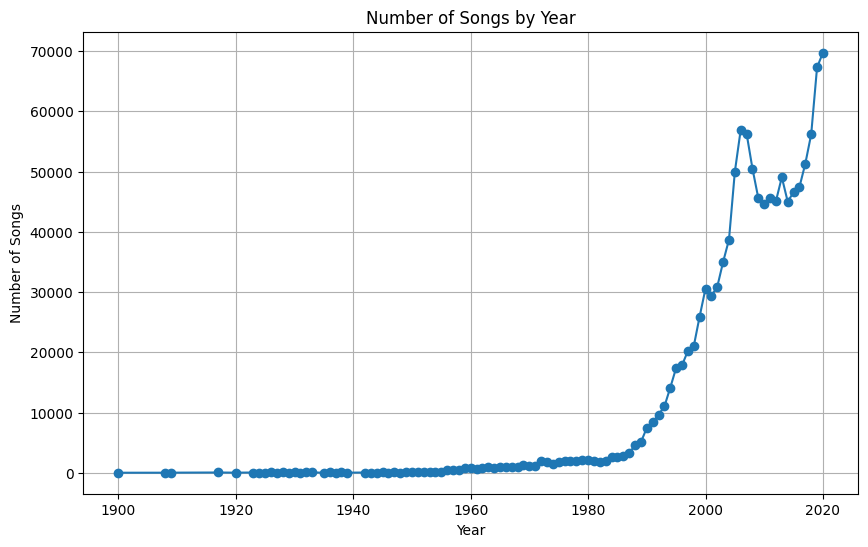

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(years, song_counts, marker='o', linestyle='-')
plt.title('Number of Songs by Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.grid(True)
plt.show()

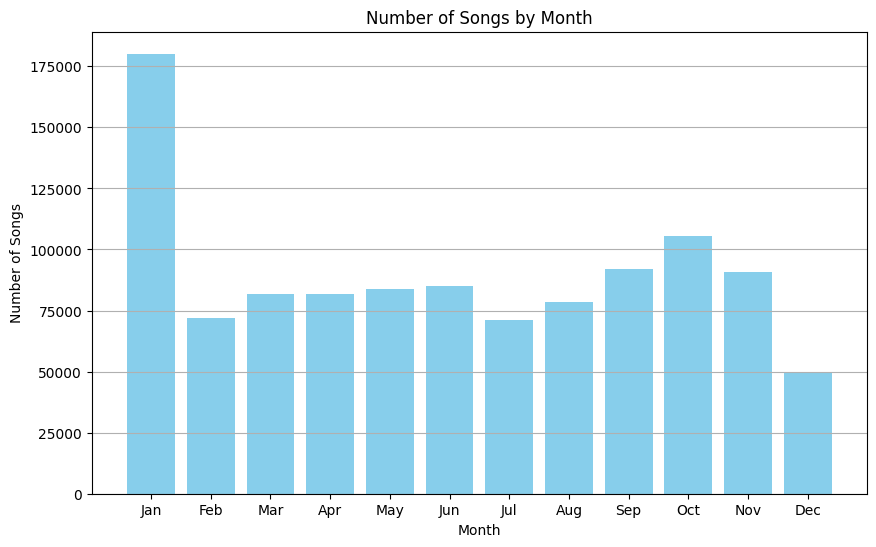

In [14]:
modified_spotify_df = spotify_df.withColumn('release_date', to_date(spotify_df['release_date'], 'yyyy-MM-dd'))

modified_spotify_df = modified_spotify_df.withColumn('release_month', month('release_date'))
modified_spotify_df = modified_spotify_df.filter(modified_spotify_df['release_month'].isNotNull())

songs_by_month = modified_spotify_df.groupby('release_month').agg(count('*').alias('song_count')).orderBy('release_month')
songs_by_month_list = songs_by_month.collect()

months = [row['release_month'] for row in songs_by_month_list]
song_counts = [row['song_count'] for row in songs_by_month_list]

plt.figure(figsize=(10, 6))
plt.bar(months, song_counts, color='skyblue')
plt.title('Number of Songs by Month')
plt.xlabel('Month')
plt.ylabel('Number of Songs')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')
plt.show()


In [17]:
fields = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

for i in range(len(fields)):
    for j in range(i+1, len(fields)):
        field1 = fields[i]
        field2 = fields[j]

        corr_coef = spotify_df.stat.corr(field1, field2)

        print(f"Correlation coefficient between {field1} and {field2}: {corr_coef}")



Correlation coefficient between danceability and energy: 0.28301014278556186


Correlation coefficient between danceability and loudness: 0.37819018567342805


Correlation coefficient between danceability and speechiness: 0.20985391457691663


Correlation coefficient between danceability and acousticness: -0.28574370907922425


Correlation coefficient between danceability and instrumentalness: -0.28533427024432684


Correlation coefficient between danceability and liveness: -0.04432894216595387


Correlation coefficient between danceability and valence: 0.5634357954305634


Correlation coefficient between danceability and tempo: 0.06058535302662619


Correlation coefficient between energy and loudness: 0.8179328879011621


Correlation coefficient between energy and speechiness: 0.1308086273363539


Correlation coefficient between energy and acousticness: -0.7962415923681575


Correlation coefficient between energy and instrumentalness: -0.2521386001326645


Correlation coefficient between energy and liveness: 0.2134933599536315


Correlation coefficient between energy and valence: 0.3995235438985902


Correlation coefficient between energy and tempo: 0.2682243073158333


Correlation coefficient between loudness and speechiness: 0.06239853512379907


Correlation coefficient between loudness and acousticness: -0.6715505688083144


Correlation coefficient between loudness and instrumentalness: -0.393043250145869


Correlation coefficient between loudness and liveness: 0.1381240119255692


Correlation coefficient between loudness and valence: 0.3849978888411588


Correlation coefficient between loudness and tempo: 0.24624200817406616


Correlation coefficient between speechiness and acousticness: -0.08236978776234256


Correlation coefficient between speechiness and instrumentalness: -0.16755479186292568


Correlation coefficient between speechiness and liveness: 0.1890124157775532


Correlation coefficient between speechiness and valence: 0.09967471529192735


Correlation coefficient between speechiness and tempo: 0.007738937446127534


Correlation coefficient between acousticness and instrumentalness: 0.24413789883087708


Correlation coefficient between acousticness and liveness: -0.11500128256773284


Correlation coefficient between acousticness and valence: -0.26882878427071666


Correlation coefficient between acousticness and tempo: -0.23101514120136177


Correlation coefficient between instrumentalness and liveness: -0.11899302215705401


Correlation coefficient between instrumentalness and valence: -0.28471580032168814


Correlation coefficient between instrumentalness and tempo: -0.07146098341049081


Correlation coefficient between liveness and valence: 0.06266192668505587


Correlation coefficient between liveness and tempo: 0.0301466376249059


Correlation coefficient between valence and tempo: 0.17618805130743603


From the correlation coefficients provided, we can understand several things about the relationships between the musical characteristics:

1. **Positive Correlation between Danceability and Loudness:** Danceability and loudness have a positive correlation coefficient of 0.378. This suggests that songs with higher danceability tend to have higher loudness.
2. **Negative Correlation between Danceability and Acousticness/Instrumentalness:** Danceability has negative correlations with acousticness (-0.286) and instrumentalness (-0.285). This indicates that songs with higher danceability tend to have lower acousticness and instrumentalness.
3. **Positive Correlation between Energy and Loudness/Valence:** Energy is positively correlated with loudness `(0.818)` and valence (0.400). This implies that songs with higher energy levels tend to be louder and have higher valence (positivity or happiness).
4. **Negative Correlation between Energy and Acousticness:** Energy has a strong negative correlation with acousticness `(-0.796)`. This suggests that energetic songs are less likely to be acoustic.
5. **Positive Correlation between Loudness and Valence:** Loudness and valence have a positive correlation coefficient of 0.385. This means that songs with higher loudness tend to have higher valence.
6. **Negative Correlation between Loudness and Acousticness/Instrumentalness:** Loudness is negatively correlated with both acousticness `(-0.672)` and instrumentalness (-0.393). This indicates that louder songs are less likely to be acoustic or instrumental.
7. **Positive Correlation between Acousticness and Valence:** Acousticness and valence have a negative correlation coefficient of -0.269. This suggests that acoustic songs are more likely to have lower valence.

## Questions
### 1. Read about how Spark and Hadoop work. What does the term ‘lazy evaluation’ mean for them? Explain with a simple example

### 2. Your main task’s dataset has about 1,200,000 rows, which makes it quite hard, and even sometimes impossible, to work with. Explain how parquet files try to solve this problem, compared to normal file formats like csv.
Parquet files are a columnar storage format commonly used in **big data processing** frameworks like Apache Spark. They are designed to address the challenges posed by large datasets, such as the one you mentioned with approximately 1,200,000 rows. Parquet files offer several advantages over normal file formats like CSV when it comes to handling large volumes of data:

1. **Columnar Storage:** Parquet files store data in a columnar format, meaning that values from each column are stored together. This storage layout is highly efficient for analytics workloads, as it allows for selective column reading. When processing queries that only access specific columns, Parquet can efficiently skip over irrelevant data, leading to significant performance gains compared to row-based storage formats like CSV.

2. **Compression:** Parquet files support various compression algorithms, such as Snappy, Gzip, and LZO. Compression reduces the file size, which not only saves storage space but also improves I/O performance by reducing disk reads and writes. With smaller file sizes, Parquet files can be transferred more quickly over the network, resulting in faster data processing.

3. **Predicate Pushdown:** Parquet files support predicate pushdown, a feature that enables query engines like Apache Spark to push filtering conditions down to the storage layer. This means that only the relevant data blocks are read from disk, reducing the amount of data transferred over the network and improving query performance. In contrast, CSV files do not inherently support predicate pushdown, so the entire file must be read into memory before filtering can be applied.

4. **Schema Evolution:** Parquet files store metadata about the schema along with the data. This allows for schema evolution, meaning that changes to the schema, such as adding new columns or modifying data types, can be easily accommodated without requiring the entire dataset to be rewritten. In contrast, modifying the schema of CSV files typically requires processing the entire dataset, which can be time-consuming and resource-intensive.

5. **Data Partitioning:** Parquet files can be partitioned based on one or more columns, enabling efficient data retrieval for specific subsets of data. Partitioning allows for faster query execution by minimizing the amount of data that needs to be scanned. CSV files do not inherently support data partitioning, so querying specific subsets of data may require scanning the entire file.